In [1]:
import pandas as pd

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
def set_xaxis(ax, n_x):
    x_ticks_major= []
    x_ticks_minor= []
    x_labels_minor= []
    x_labels_major= []
    m_empty_string= ''
    for i in xrange(n_x):
        m_time_minute= 5 * (i + 1)
        m_minute_string= '{}M'.format(m_time_minute).zfill(5)
        if m_time_minute % 60 == 0:
            m_hour= m_time_minute / 60
            m_hour_string= '{}H'.format(m_hour).zfill(3)
            x_ticks_major.append(float(i))
            x_labels_major.append(m_hour_string)
        else:
            x_ticks_minor.append(float(i))
            x_labels_minor.append(m_minute_string)
    ax.set_xticks(x_ticks_minor, minor=True)
    ax.set_xticks(x_ticks_major, minor=False)
    ax.set_xticklabels(x_labels_major, minor=False, rotation=65)
    ax.grid(True, which='major')
    ax.set_xlabel('time')
    ax.set_ylabel('veh/5m')

In [4]:
# clusters= ["cluster_{}".format(i) for i in xrange(0,7)]
# partitions= ['weekday', 'weekend']
# for p in partitions:
#     for c in clusters:
#         df= pd.read_csv('./data/kmeans/{}/total_flow_{}_label_stats.kmeans_2014_{}.csv'.format(p, c, p), header= None)
#         m_mean_vector= df.iloc[0].values
#         m_std_vector= np.sqrt(df.iloc[1]).values
#         #
#         msub_vec= m_mean_vector - m_std_vector
#         madd_vec= m_mean_vector + m_std_vector
#         #
#         fig, ax= plt.subplots(figsize=(16,8))
#         ax.plot(msub_vec, c='green', ls='dashed', lw=2.0, label='std')
#         ax.plot(m_mean_vector, c='blue', lw=2.0, label='mean')
#         ax.plot(madd_vec, c='green', ls='dashed', lw=2.0)
#         ax.legend()
#         #
#         m_title= '2014_{}_{}_mean+std'.format(p, c)
#         ax.set_title(m_title)
#         #
#         set_xaxis(ax, len(m_mean_vector))

In [5]:
a_df= pd.read_csv('./data/kmeans/weekday/total_flow_cluster_fractions.kmeans_2014_weekday.csv', header= None).sort(0)
a_df.columns= ['cluster_id', 'fraction']
a_df.set_index('cluster_id', inplace=True)
a_df

,fraction
cluster_id,
0,0.142650
1,0.178197
2,0.213878
3,0.047119
4,0.117665
5,0.181230
6,0.119261


In [6]:
b_df= pd.read_csv('./data/kmeans/weekend/total_flow_cluster_fractions.kmeans_2014_weekend.csv', header= None).sort(0)
b_df.columns= ['cluster_id', 'fraction']
b_df.set_index('cluster_id', inplace=True)
b_df

,fraction
cluster_id,
0,0.120878
1,0.032644
2,0.192229
3,0.111596
4,0.161788
5,0.190705
6,0.190160


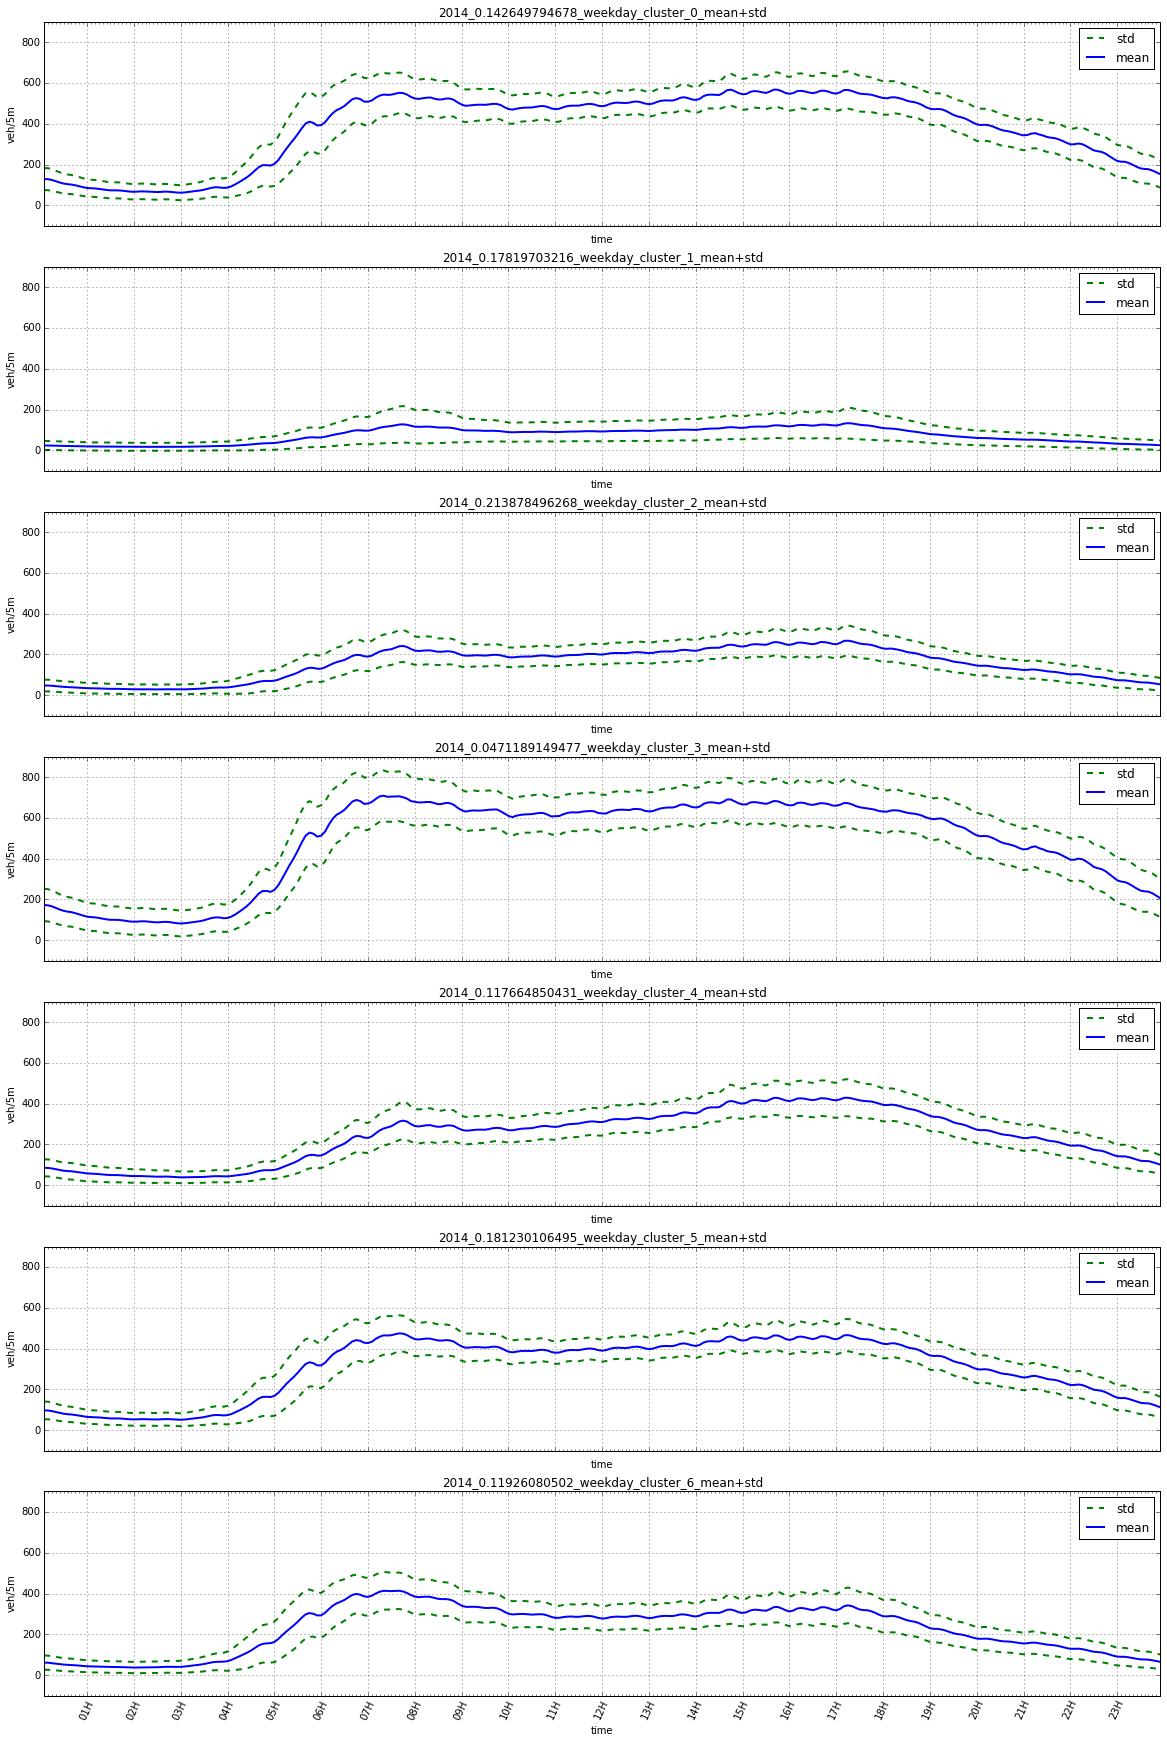

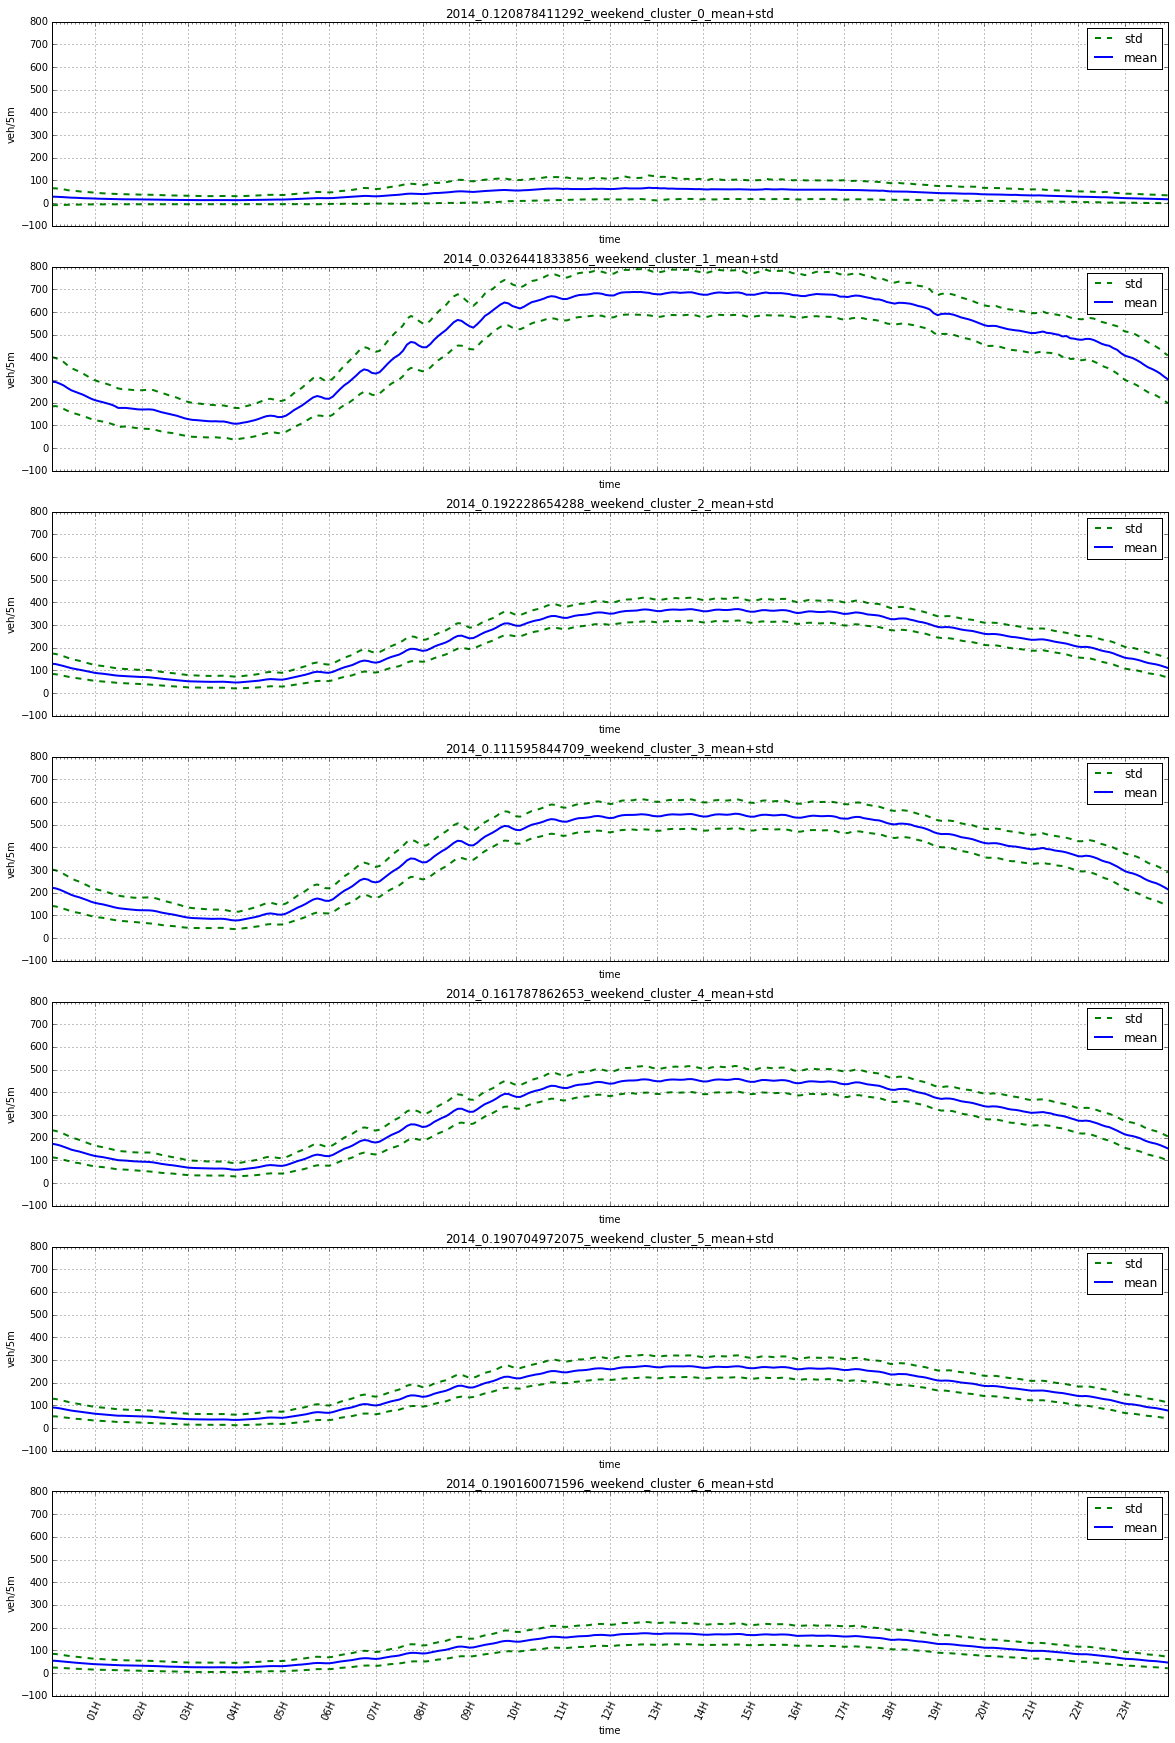

In [7]:
rows= 7
columns= 2
clusters= ["cluster_{}".format(i) for i in xrange(0,rows)]
partitions= ['weekday', 'weekend']

figsize= (20, 30)

fig, axes = plt.subplots(nrows=rows, ncols=1, sharex=True, sharey=True, figsize=figsize)
values_start_idx= 7
for row in xrange(0, rows):
    c= clusters[row]
    p= partitions[0]
    f_value= a_df.iloc[row].values[0]
    df= pd.read_csv('./data/kmeans/{}/total_flow_{}_label_stats.kmeans_2014_{}.csv'.format(p, c, p), header= None)
    m_mean_vector= df.iloc[0].values[values_start_idx:]
    m_std_vector= np.sqrt(df.iloc[1]).values[values_start_idx:]
    #
    msub_vec= m_mean_vector - m_std_vector
    madd_vec= m_mean_vector + m_std_vector
    #
    ax= axes[row]
    ax.plot(msub_vec, c='green', ls='dashed', lw=2.0, label='std')
    ax.plot(m_mean_vector, c='blue', lw=2.0, label='mean')
    ax.plot(madd_vec, c='green', ls='dashed', lw=2.0)
    ax.legend()
    #
    m_title= '2014_{}_{}_{}_mean+std'.format(f_value, p, c)
    ax.set_title(m_title)
    #
    set_xaxis(ax, len(m_mean_vector))
fig.savefig('2014_weekday_kmeans.png')

fig, axes = plt.subplots(nrows=rows, ncols=1, sharex=True, sharey=True, figsize=figsize)
for row in xrange(0, rows):
    c= clusters[row]
    p= partitions[1]
    f_value= b_df.iloc[row].values[0]
    df= pd.read_csv('./data/kmeans/{}/total_flow_{}_label_stats.kmeans_2014_{}.csv'.format(p, c, p), header= None)
    m_mean_vector= df.iloc[0].values[values_start_idx:]
    m_std_vector= np.sqrt(df.iloc[1]).values[values_start_idx:]
    #
    msub_vec= m_mean_vector - m_std_vector
    madd_vec= m_mean_vector + m_std_vector
    #
    ax= axes[row]
    ax.plot(msub_vec, c='green', ls='dashed', lw=2.0, label='std')
    ax.plot(m_mean_vector, c='blue', lw=2.0, label='mean')
    ax.plot(madd_vec, c='green', ls='dashed', lw=2.0)
    ax.legend()
    #
    m_title= '2014_{}_{}_{}_mean+std'.format(f_value, p, c)
    ax.set_title(m_title)
    #
    set_xaxis(ax, len(m_mean_vector))
fig.savefig('2014_weekend_kmeans.png')

In [8]:
id_columns= [i for i in xrange(6)]
id_columns

[0, 1, 2, 3, 4, 5]

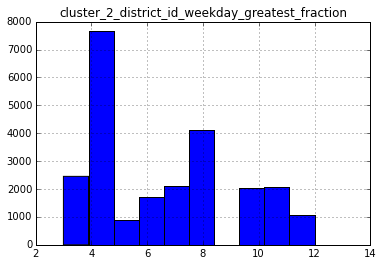

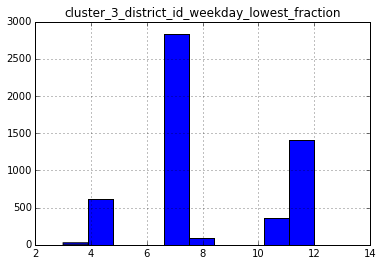

In [9]:
# greatest/lowest weekday fraction
cluster_list= ['cluster_2', 'cluster_3']
titles= ['weekday_greatest_fraction', 'weekday_lowest_fraction']
for c,t in zip(cluster_list, titles):
    s= './data/kmeans/weekday/total_flow_{}_label_sample.kmeans_2014_weekday.csv'.format(c)
    w_df= pd.read_csv(s, header=None)[id_columns]
    w_df.columns= ['station_id', 'district_id', 'year', 'day_of_year', 'day_of_week', 'direction']
    w_df= w_df.astype(int)
    #
    plt.figure()
    ax= w_df['district_id'].hist()
    ax.set_title('{}_district_id_{}'.format(c, t))

./data/kmeans/weekend/total_flow_cluster_2_label_sample.kmeans_2014_weekend.csv
./data/kmeans/weekend/total_flow_cluster_1_label_sample.kmeans_2014_weekend.csv


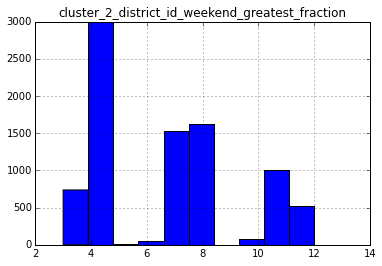

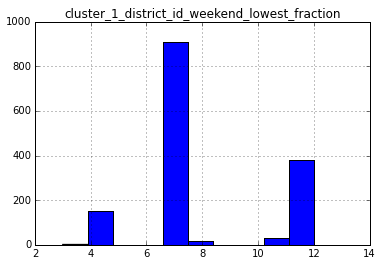

In [10]:
# greatest/lowest weekend fraction
cluster_list= ['cluster_2', 'cluster_1']
titles= ['weekend_greatest_fraction', 'weekend_lowest_fraction']
for c,t in zip(cluster_list, titles):
    s= './data/kmeans/weekend/total_flow_{}_label_sample.kmeans_2014_weekend.csv'.format(c)
    print(s)
    w_df= pd.read_csv(s, header=None)[id_columns]
    w_df.columns= ['station_id', 'district_id', 'year', 'day_of_year', 'day_of_week', 'direction']
    w_df= w_df.astype(int)
    #
    plt.figure()
    ax= w_df['district_id'].hist()
    ax.set_title('{}_district_id_{}'.format(c, t))

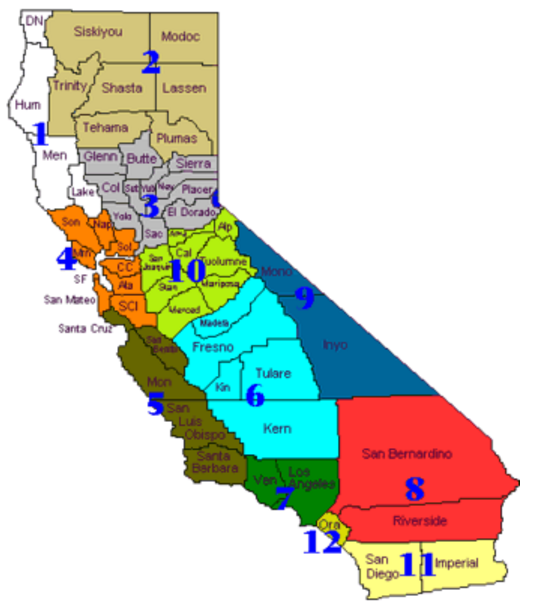

In [11]:
from IPython.display import display, Image

display(Image(filename='./data/district_map.png'))